# SOFTMAX CLASSIFIER FROM SCRATCH
### Categorical crossentropy as loss function and Gradient descent as optimizer

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical

In [87]:
iris = datasets.load_iris()
X = iris.data[:,[0,3]]
y = iris.target

In [88]:
# shuffling data

arr = np.concatenate((X,y.reshape(150, 1)), axis=1)
np.random.shuffle(arr)
X = arr[:, :-1]
y = arr[:, -1]

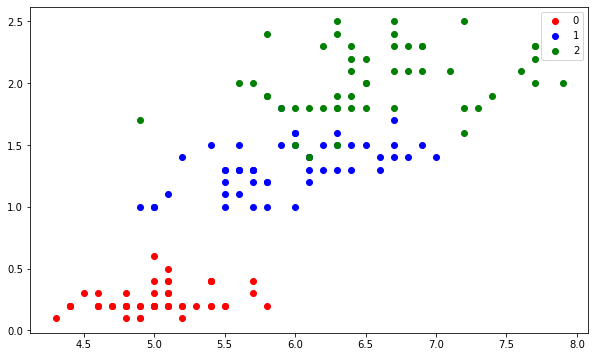

In [89]:
plt.figure(figsize=(10,6))
plt.scatter(X[y==0][:,0],X[y==0][:,1], color='red', label='0')
plt.scatter(X[y==1][:,0],X[y==1][:,1], color='blue', label='1')
plt.scatter(X[y==2][:,0],X[y==2][:,1], color='green', label='2')
plt.legend(loc='best')
plt.show()

In [90]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=24)

In [91]:
# baseline
from sklearn.linear_model import LogisticRegression
mcl = LogisticRegression(multi_class='multinomial')
mcl.fit(x_train ,y_train)
mcl.score(x_test, y_test)

0.9333333333333333

In [92]:
class SoftmaxClassifier():
    def __init__(self, lr, epochs, verbose=False):
        self.lr = lr
        self.epochs = epochs
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0],1))
        return np.concatenate((intercept, X),axis=1)
    
#     def __calc_acc(y_hat, y):
#         print(y_hat)
#         return ((y_hat.round() == y).mean() * 100).round(2)
    
    def __calc_probs(self, X):
        z  = np.dot(X,self.w)
        return np.array([np.exp(x)/np.sum(np.exp(x)) for x in z])
        
    def __loss(self, y, probs):
        return (-np.sum(y * np.log(probs)))
    
    def fit(self, X, y):
        X = self.__add_intercept(X)
        ye = to_categorical(y)
        self.w = np.random.rand(X.shape[1],len(set(y)))
        loss_arr = []
        
        
        for i in range(1,self.epochs+1):
            probs = self.__calc_probs(X)
            
            loss = self.__loss(ye, probs)
            
            loss_arr.append(loss)
            
            grad = (np.dot(X.T,(probs - ye)))/X.shape[0]
            
            self.w -= self.lr*grad

            if self.verbose == True and i % (self.epochs/10) == 0 and i != 0:
                print(f'Epoch: {i} | Loss: {loss}')
        
        return loss_arr
    
    def predict_probs(self, X):
        return self.__calc_probs(self.__add_intercept(X))

In [93]:
## 100 iterations like baseline model
sc = SoftmaxClassifier(lr=0.1, epochs=100, verbose=True)

In [94]:
loss = sc.fit(x_train, y_train)

Epoch: 10 | Loss: 69.73405391776987
Epoch: 20 | Loss: 64.08952517013662
Epoch: 30 | Loss: 59.63687202249652
Epoch: 40 | Loss: 56.06110262375806
Epoch: 50 | Loss: 53.1361279059586
Epoch: 60 | Loss: 50.70115422825545
Epoch: 70 | Loss: 48.641287497957634
Epoch: 80 | Loss: 46.87347161495242
Epoch: 90 | Loss: 45.336776432992025
Epoch: 100 | Loss: 43.985794977277095


In [95]:
preds = sc.predict_probs(x_test)

In [96]:
(np.argmax(preds, axis=1) == y_test).mean()

0.92

Text(0.5, 1.0, 'Loss with 100 iterations')

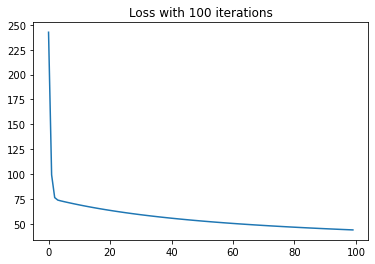

In [97]:
plt.plot(loss)
plt.title('Loss with 100 iterations')

In [98]:
## 1000 iterations
sc = SoftmaxClassifier(lr=0.1, epochs=1000, verbose=True)
loss = sc.fit(x_train, y_train)

Epoch: 100 | Loss: 45.429408551358065
Epoch: 200 | Loss: 36.47560579875916
Epoch: 300 | Loss: 32.0684250152388
Epoch: 400 | Loss: 29.23780386626546
Epoch: 500 | Loss: 27.18891577112984
Epoch: 600 | Loss: 25.605124592543604
Epoch: 700 | Loss: 24.32922123058276
Epoch: 800 | Loss: 23.271560407346705
Epoch: 900 | Loss: 22.37603871422985
Epoch: 1000 | Loss: 21.6051678048451


In [99]:
preds = sc.predict_probs(x_test)
print((np.argmax(preds, axis=1) == y_test).mean())

0.96


Text(0.5, 1.0, 'Loss with 1000 iterations')

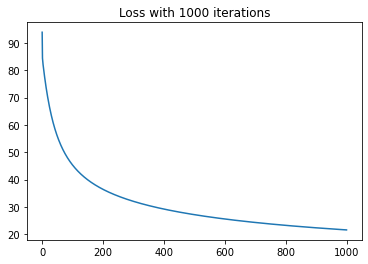

In [100]:
plt.plot(loss)
plt.title('Loss with 1000 iterations')